## <p style="text-align: center;">Влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике </p>

Суть одного из проектов UNICEF (международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру) — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска. 

В данном ноутбуке проведён разведывательный анализ данных с целью определения параметров модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы.

### Первичный отсмотр данных

Начнем с азов: импортируем нужные для чтения и первичного анализа библиотеки и прочитаем файл:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')

%matplotlib inline

In [4]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud_math.loc[stud_math.loc[:, column].isin(
                    stud_math.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


def get_stat_dif(column):
    #cols = stud_math.loc[:, column].value_counts().index[:10]
    cols = stud_math.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break


def get_outliers(column):
    IQR = stud_math[column].quantile(0.75) - stud_math[column].quantile(0.25)
    perc25 = stud_math[column].quantile(0.25)
    perc75 = stud_math[column].quantile(0.75)

    print(
        '25-й перцентиль: {},'.format(perc25),
        '75-й перцентиль: {},'.format(perc75),
        "IQR: {}, ".format(IQR),
        "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [5]:
display(stud_math.head(10))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Исходный набор данных содержит 13 числовых столбцов и 17 строковых столбцов.

### Первичный анализ данных в столбцах

Для удобства использования pandas переименуем все столбцы:

In [6]:
stud_math.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [7]:
new_columns = ['school', 'sex', 'age', 'address', 'famsize', 'parent_status', 'mother_edu', 'father_edu',
               'mother_job', 'father_job', 'reason', 'guardian', 'traveltime', 'studytime',
               'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
               'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
               'freetime', 'go_out', 'health', 'absences', 'score']

stud_math.columns = new_columns
stud_math.shape

(395, 30)

Для анализа будут интересны следующие столбцы (вряд ли на контрольный признак влияет посещение детского сада в прошлом в этой возрастной группе, а также адрес места жительства и причина выбора школы):

In [8]:
stud_math = stud_math[['school', 'sex', 'age', 'famsize', 'parent_status', 'mother_edu', 'father_edu',
                       'mother_job', 'father_job', 'traveltime', 'studytime',
                       'schoolsup', 'famsup', 'paid', 'activities', 'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
                       'freetime', 'go_out', 'health', 'absences', 'score']]
stud_math.shape
# stud_math.dropna()

(395, 25)

Сразу заменим пропуски и значения 'nan' во всех столбцах на None, а также значения 'yes'/'no' на True/False соответственно: 

In [9]:
for column in stud_math.columns:
    stud_math[column] = stud_math[column].apply(lambda x: None if pd.isnull(x) else None if x == 'nan'
                                                else x)
    # if stud_math[column].dtype == object:
    #    stud_math = stud_math.replace({column: {'yes': 1, 'no': 0}})

stud_math.head(10)

,school,sex,age,famsize,parent_status,mother_edu,father_edu,mother_job,father_job,traveltime,studytime,schoolsup,famsup,paid,activities,"studytime, granular",higher,internet,romantic,famrel,freetime,go_out,health,absences,score
0,GP,F,18,None,A,4.0,4.0,at_home,teacher,2.0,2.0,yes,no,no,no,-6.0,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,GT3,None,1.0,1.0,at_home,other,1.0,2.0,no,yes,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,LE3,T,1.0,1.0,at_home,other,1.0,2.0,yes,no,None,no,-6.0,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,GT3,T,4.0,2.0,health,None,1.0,3.0,no,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,GT3,T,3.0,3.0,other,other,1.0,2.0,no,yes,yes,no,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,LE3,T,4.0,3.0,services,other,1.0,2.0,no,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,LE3,T,2.0,2.0,other,other,1.0,2.0,no,no,no,no,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,GT3,A,4.0,4.0,other,teacher,2.0,2.0,yes,yes,no,no,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,LE3,A,3.0,2.0,services,other,1.0,2.0,no,yes,yes,no,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,None,None,3.0,4.0,other,other,1.0,2.0,no,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


Для начала рассмотрим уникальные значения во всех интересуемых столбцах:

In [10]:
for column in stud_math.columns:
    print('Столбец {}:'.format(column))
    display(stud_math[column].value_counts())

Столбец school:


GP    349
MS     46
Name: school, dtype: int64

Столбец sex:


F    208
M    187
Name: sex, dtype: int64

Столбец age:


16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

Столбец famsize:


GT3    261
LE3    107
Name: famsize, dtype: int64

Столбец parent_status:


T    314
A     36
Name: parent_status, dtype: int64

Столбец mother_edu:


4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: mother_edu, dtype: int64

Столбец father_edu:


2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: father_edu, dtype: int64

Столбец mother_job:


other       133
services     98
at_home      58
teacher      55
health       32
Name: mother_job, dtype: int64

Столбец father_job:


other       197
services    102
teacher      29
at_home      16
health       15
Name: father_job, dtype: int64

Столбец traveltime:


1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

Столбец studytime:


2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

Столбец schoolsup:


no     335
yes     51
Name: schoolsup, dtype: int64

Столбец famsup:


yes    219
no     137
Name: famsup, dtype: int64

Столбец paid:


no     200
yes    155
Name: paid, dtype: int64

Столбец activities:


yes    195
no     186
Name: activities, dtype: int64

Столбец studytime, granular:


-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64

Столбец higher:


yes    356
no      19
Name: higher, dtype: int64

Столбец internet:


yes    305
no      56
Name: internet, dtype: int64

Столбец romantic:


no     240
yes    124
Name: romantic, dtype: int64

Столбец famrel:


 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

Столбец freetime:


3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

Столбец go_out:


3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: go_out, dtype: int64

Столбец health:


5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

Столбец absences:


0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

Столбец score:


50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

#### Количество баллов по госэкзамену по математике (score)

Сначала рассмотрим столбец score, поскольку нас интересует зависимость количества баллов по госэкзамену по математике от других признаков в наборе данных.

Этот столбец содержит отсутсвующие значения - удалим строки, в которых они находятся, в наборе данных, потому что эти строки не представляют интереса для анализа данных.

In [11]:
# stud_math = stud_math[stud_math.score.notna()]
stud_math.dropna(subset=['score'], inplace=True)
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   famsize              362 non-null    object 
 4   parent_status        344 non-null    object 
 5   mother_edu           386 non-null    float64
 6   father_edu           365 non-null    float64
 7   mother_job           370 non-null    object 
 8   father_job           353 non-null    object 
 9   traveltime           361 non-null    float64
 10  studytime            382 non-null    float64
 11  schoolsup            380 non-null    object 
 12  famsup               351 non-null    object 
 13  paid                 350 non-null    object 
 14  activities           375 non-null    object 
 15  studytime, granular  382 non-null    flo

In [12]:
display(stud_math.score.describe())
get_outliers('score')

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


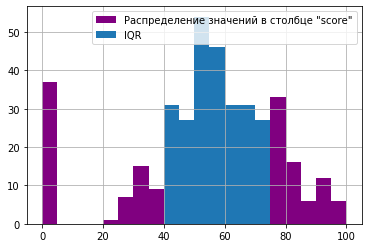

In [13]:
stud_math.score.hist(bins=20, range=(0, 100), color='purple',
                     label='Распределение значений в столбце "score"')
stud_math.score.loc[stud_math.score.between(40, 70)].hist(
    bins=20, range=(0, 100), label='IQR')

plt.legend()

#### Аббревиатура школы, в которой учится ученик (school)

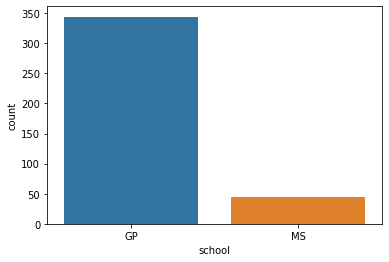

In [14]:
sns.countplot(x='school', data=stud_math)

#### Возраст ученика (age)

In [15]:
display(stud_math.age.describe())
get_outliers('age')

count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


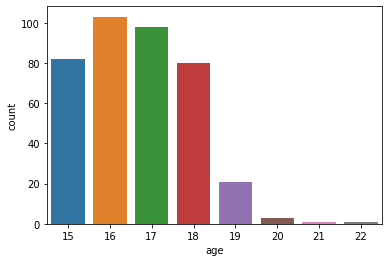

In [16]:
sns.countplot(x='age', data=stud_math)

Как мы видим, большинству учащихся от 16 до 18 лет
В данных есть выбросы: одному учащемуся 22 года.
Этот способ позволил нам отобрать экстремально низкие и экстремально высокие оценки. Отфильтруем данные:

In [17]:
perc25 = 16
perc75 = 18
IQR = 2

stud_math = stud_math.loc[stud_math.age.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

#### Количество пропущенных занятий (absences)

In [18]:
display(stud_math.absences.describe())
get_outliers('absences')

count    377.000000
mean       7.297082
std       23.642659
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


В столбце, содержащем количество пропущенных занятий, присутствуют выбросы значений - отфильтруем их.

In [19]:
perc25 = 0
perc75 = 8
IQR = 8

stud_math = stud_math.loc[stud_math.age.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
stud_math.shape

(387, 25)

Text(0.5, 0, 'Количество пропущенных занятий')

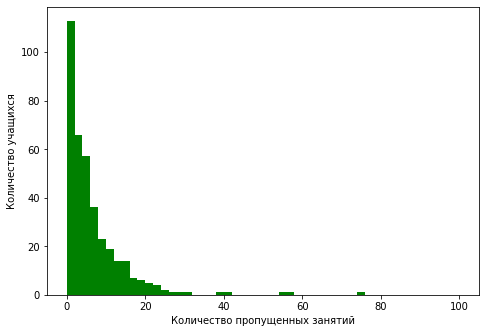

In [20]:
# stud_math.absences.hist(bins = 40, range = (0, 100), color='purple')
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(stud_math['absences'], bins=50, color='green', range=[0, 100])
axes.set_ylabel('Количество учащихся')
axes.set_xlabel('Количество пропущенных занятий')

#### Пол (sex)

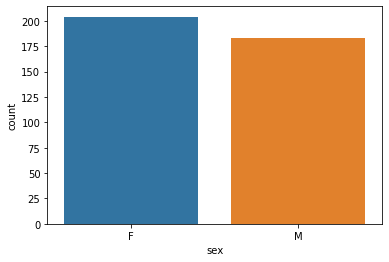

In [22]:
sns.countplot(x='sex', data=stud_math)

#### Образование матери (mother_edu)

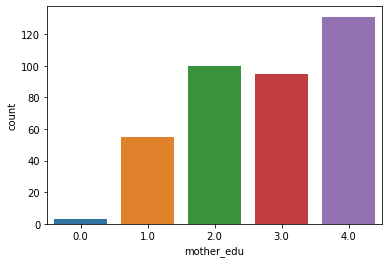

In [23]:
sns.countplot(x='mother_edu', data=stud_math)

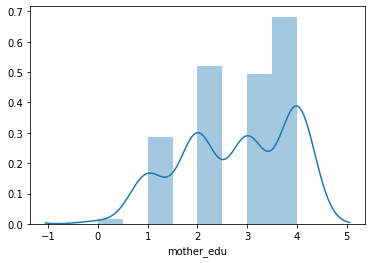

In [24]:
sns.distplot(stud_math['mother_edu'])

#### Образование отца (father_edu)

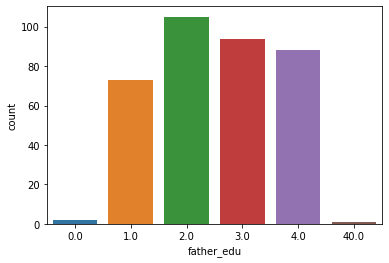

In [25]:
sns.countplot(x='father_edu', data=stud_math)

Среди значений столбца "Образование отца (father_edu)" имеется "40" - вероятно, ошибка допущенная при ручном вводе. 
Преобразуем его к "4.0".

In [26]:
stud_math.loc[stud_math.father_edu == 40].index

Int64Index([11], dtype='int64')

In [27]:
stud_math.loc[11, 'father_edu'] = 4.0

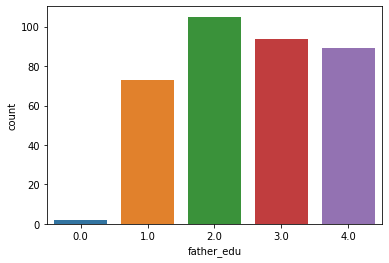

In [28]:
sns.countplot(x='father_edu', data=stud_math)

#### Область деятельности матери (mother_job)

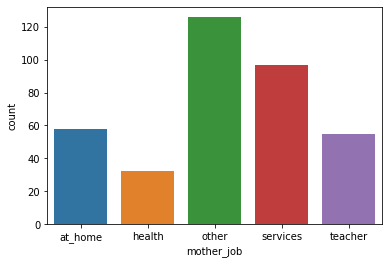

In [29]:
sns.countplot(x='mother_job', data=stud_math)

#### Область деятельности отца (father_job)

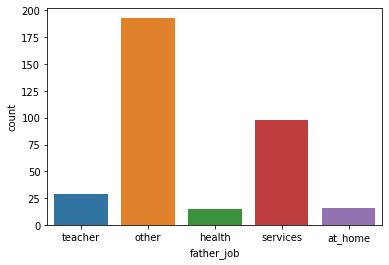

In [30]:
sns.countplot(x='father_job', data=stud_math)

###  Корреляционный анализ

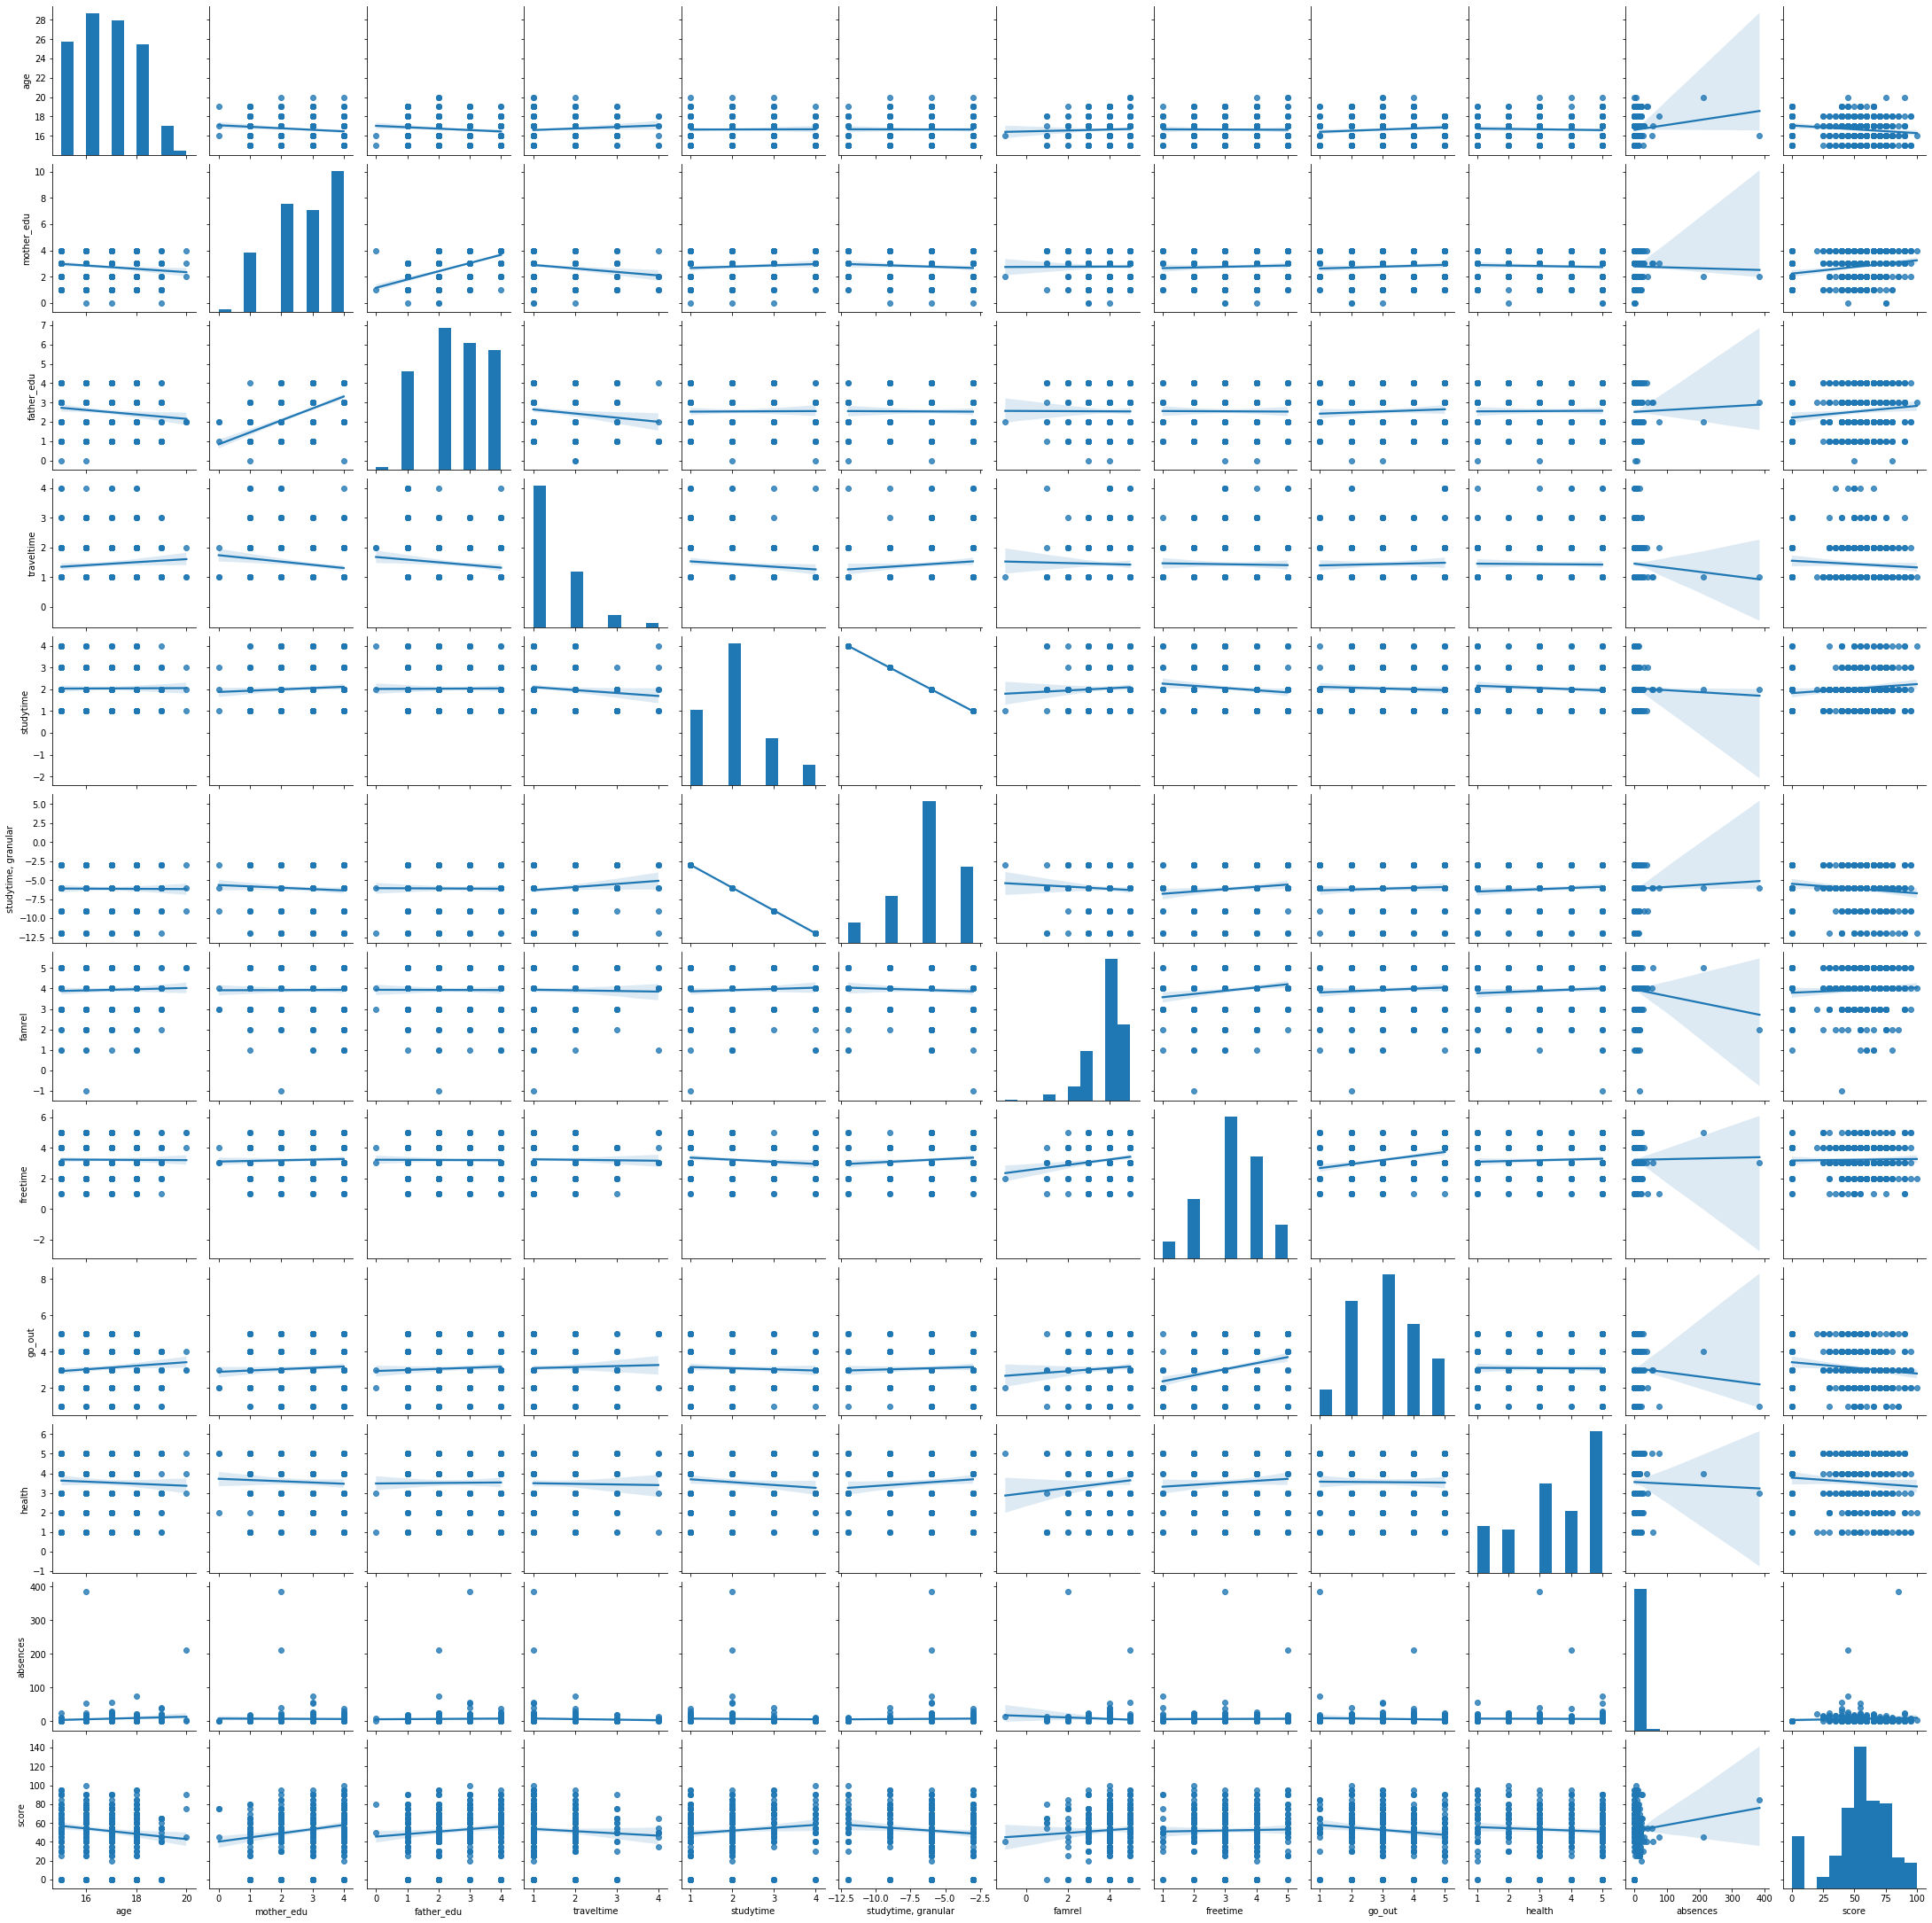

In [31]:
sns.pairplot(stud_math, kind='reg')

In [32]:
correlation = stud_math.corr()
stud_math.corr()

,age,mother_edu,father_edu,traveltime,studytime,"studytime, granular",famrel,freetime,go_out,health,absences,score
age,1.000000,-0.140630,-0.128687,0.090292,0.006644,-0.006644,0.037721,-0.009457,0.107659,-0.046348,0.098095,-0.149173
mother_edu,-0.140630,1.000000,0.622291,-0.169196,0.077044,-0.077044,0.005162,0.045940,0.071545,-0.049512,-0.015102,0.211404
father_edu,-0.128687,0.622291,1.000000,-0.138377,0.007761,-0.007761,-0.003909,-0.007025,0.058098,0.009933,0.021790,0.126711
traveltime,0.090292,-0.169196,-0.138377,1.000000,-0.110876,0.110876,-0.023096,-0.021849,0.035653,-0.015652,-0.048024,-0.073090
studytime,0.006644,0.077044,0.007761,-0.110876,1.000000,-1.000000,0.054652,-0.117579,-0.048896,-0.087243,-0.025213,0.112229
"studytime, granular",-0.006644,-0.077044,-0.007761,0.110876,-1.000000,1.000000,-0.054652,0.117579,0.048896,0.087243,0.025213,-0.112229
famrel,0.037721,0.005162,-0.003909,-0.023096,0.054652,-0.054652,1.000000,0.167419,0.071673,0.087992,-0.083411,0.061568
freetime,-0.009457,0.045940,-0.007025,-0.021849,-0.117579,0.117579,0.167419,1.000000,0.295910,0.070852,0.010850,0.023824
go_out,0.107659,0.071545,0.058098,0.035653,-0.048896,0.048896,0.071673,0.295910,1.000000,-0.009663,-0.049890,-0.128049
health,-0.046348,-0.049512,0.009933,-0.015652,-0.087243,0.087243,0.087992,0.070852,-0.009663,1.000000,-0.014654,-0.074330


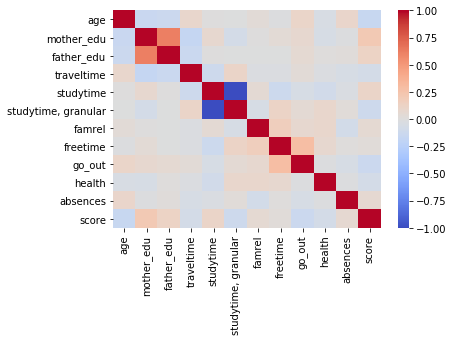

In [33]:
sns.heatmap(correlation, cmap='coolwarm')

Судя по тепловой карте с увеличением возраста учащиеся меньше уделяют внимание математике, а образованные родители убеждают своих детей больше заниматься математикой (образованные матери в большей степени). Физически более слабые дети делают бОльшие успехи в математике. 

Данные в столбцах **'studytime'** и **'studytime, granular'** сильно скоррелированы и отражают фактически противоположные величины, таким образом, столбец 'studytime, granular' содержит "сводное" свободное время от учёбы.

Для использования в модели оставим следующие слабо скоррелированные с количеством баллов (**score**) по математике переменные: **'age', 'mother_edu', 'father_edu', 'studytime', 'absences', 'studytime, granular'**.

### Анализ номинативных переменных

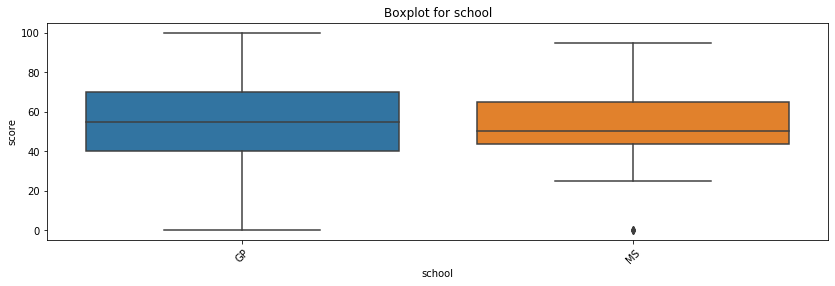

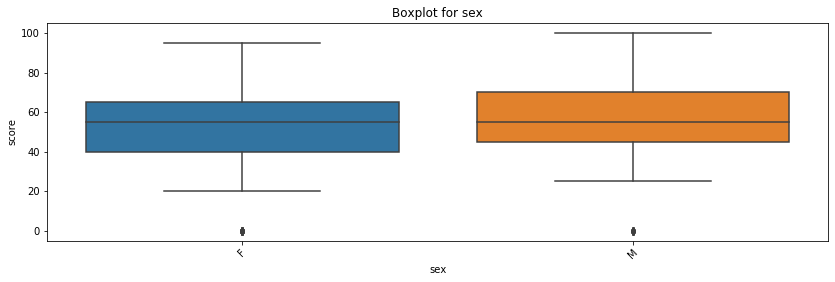

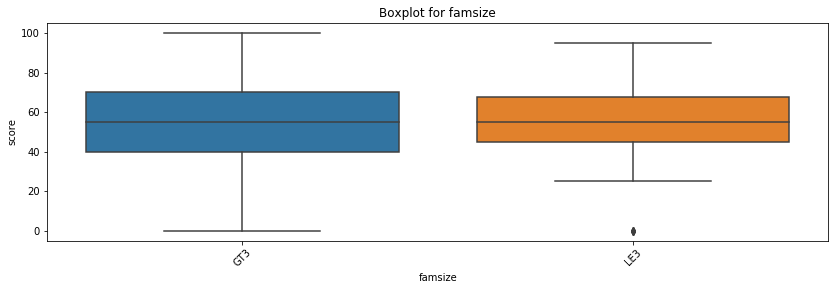

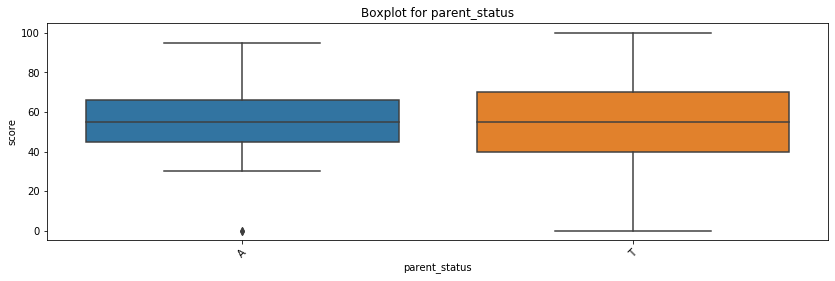

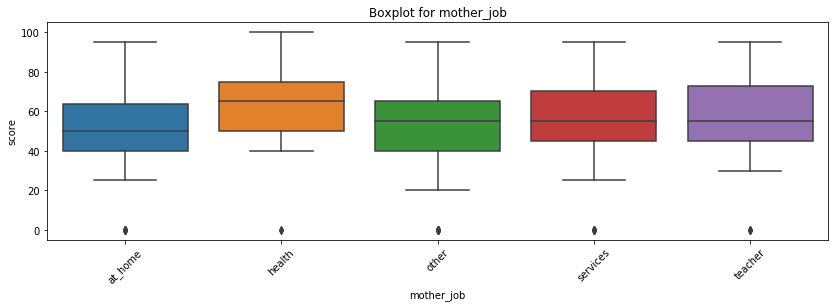

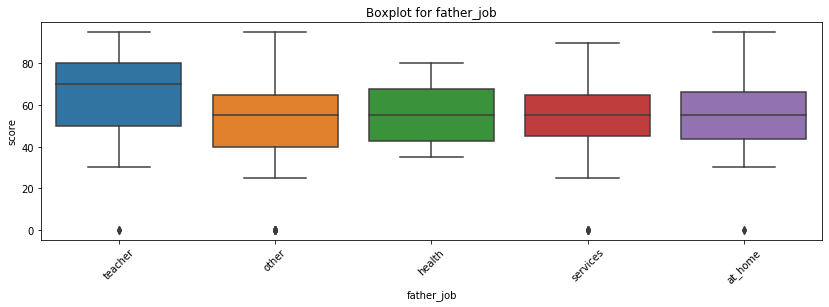

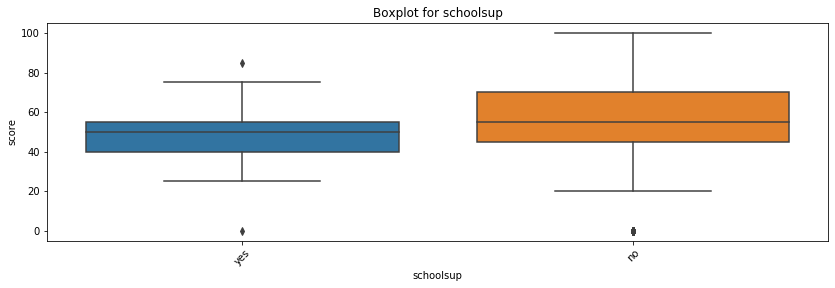

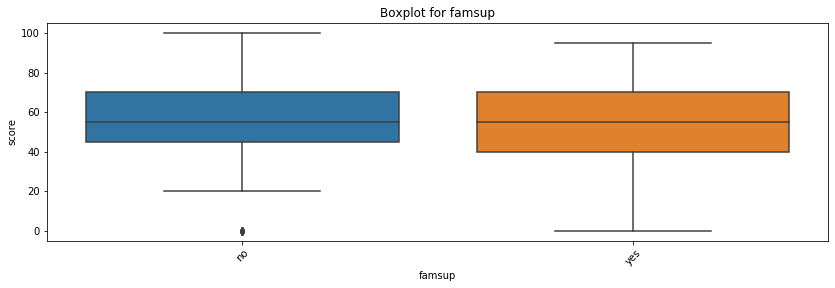

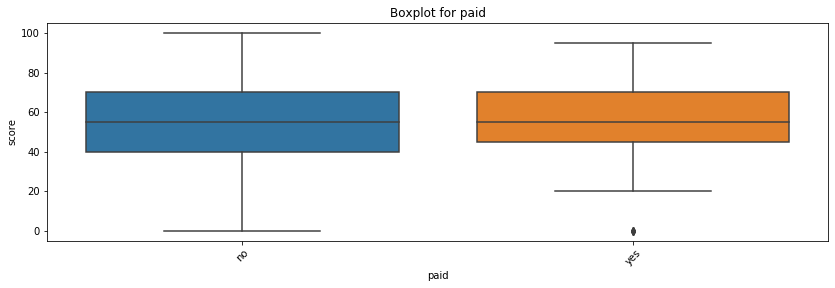

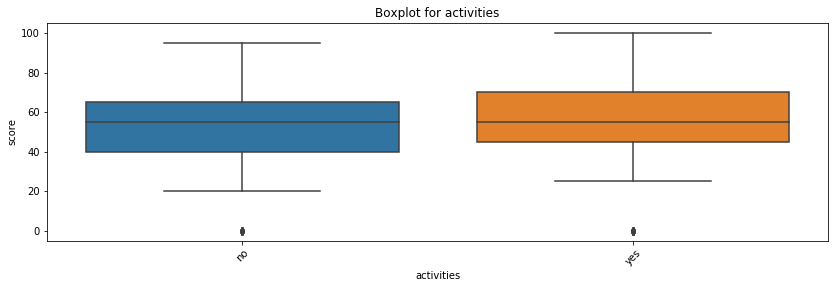

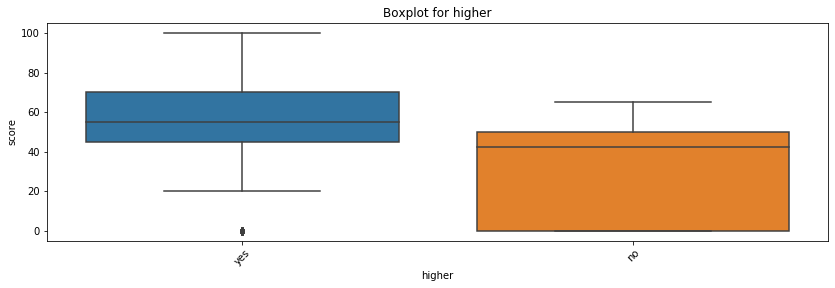

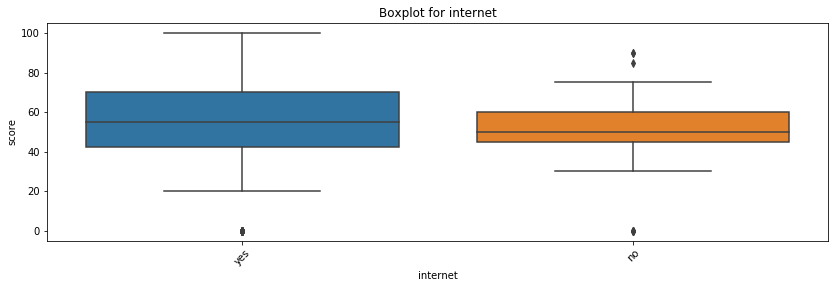

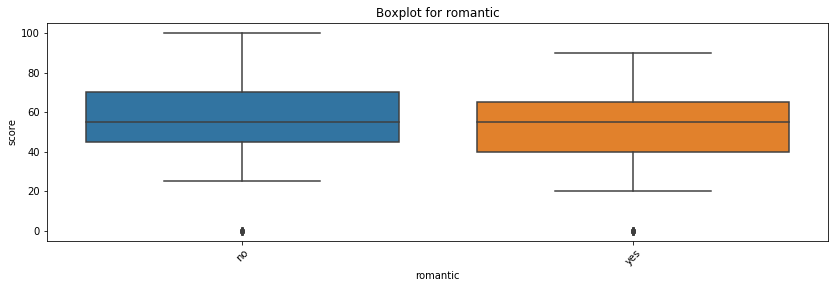

In [34]:
for col in stud_math.columns:
    if stud_math[col].dtype == object:
        get_boxplot(col)

In [35]:
for col in stud_math.columns:
    if stud_math[col].dtype == object:
        get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки mother_job
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Как мы видим, серьёзно отличаются четыре параметра: **'sex', 'mother_job', 'higher', 'romantic'**. Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на количество баллов по математике на госэкзамене, это: **'age', 'father_edu', 'sex', 'mother_job', 'higher', 'romantic', 'mother_edu', 'studytime', 'studytime, granular', 'absences'**.

In [36]:
stud_math = stud_math.loc[:, ['age', 'father_edu', 'sex', 'mother_job', 'higher',
                              'romantic', 'mother_edu', 'studytime', 'studytime, granular', 'famrel', 'absences']]

### Выводы

Итак, в результате EDA для анализа влияния параметров шоколада на экспертную оценку шоколадных батончиков были получены следующие выводы:
- В данных достаточно много пустых значений.
- Выбросы найдены только в столбцах с возрастом и количеством пропущенных занятий, что позволяет сделать вывод о том, что данные достаточно чистые.
- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это **'age', 'father_edu', 'sex', 'mother_job', 'higher', 'romantic', 'mother_edu', 'studytime', 'studytime, granular', 'absences'**.